In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model, metrics, model_selection, preprocessing, ensemble, svm
from sklearn.model_selection import StratifiedShuffleSplit
from scipy import sparse
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import matplotlib.ticker as mtick

In [5]:
from sklearn.utils import shuffle

In [6]:
from plot_function import plot_randomforest

In [7]:
Ames = pd.read_csv('AmesFinalDB.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)
Ames.head(3)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mo_Sold,Sale_Type,Sale_Condition,SalePrice,exterior,basement_type,basement_area,age,remodeled_age,garage_age
0,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,5,WD,Normal,215000,0,BLQ_Unf,639.0,50,0,50.0
1,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,6,WD,Normal,105000,VinylSd_VinylSd,Rec_LwQ,612.0,49,0,49.0
2,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,6,WD,Normal,172000,Wd Sdng_Wd Sdng,ALQ_Unf,923.0,52,0,52.0


In [8]:
print('Ames shape is : ', str(Ames.shape))

Ames shape is :  (2930, 59)


In [9]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])

Ordinal_featues = ['Overall_Qual','Overall_Cond','Bsmt_Full_Bath','Bsmt_Half_Bath','Bedroom_AbvGr','Full_Bath',
                  'Half_Bath','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars']

Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area'])              
Continous_features.extend(['Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [10]:
X = Ames.drop(['SalePrice'],axis=1).copy()
Y = Ames.SalePrice.copy()

In [11]:
AmesFinal = X.drop(categorical_features,axis = 1).copy()
AmesData = AmesFinal.values
AmesCol = AmesFinal.columns

for ifeature in categorical_features:
    
    temp_df = pd.get_dummies(Ames.loc[:,ifeature], prefix = ifeature, prefix_sep = '_')
    AmesCol = list(AmesCol) + list(temp_df.columns)
    temp_data = temp_df.values
    AmesData = np.hstack([AmesData,temp_data])
    
AmesFinal = pd.DataFrame(AmesData, columns = AmesCol)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
oe = OrdinalEncoder()

In [14]:
X.shape

(2930, 58)

In [15]:
Ames.shape

(2930, 59)

In [16]:
Xoe = oe.fit_transform(X)

In [17]:
Xoe = pd.DataFrame(data = Xoe, columns = X.columns)

In [18]:
Xoe.shape

(2930, 58)

In [19]:
X = AmesFinal.copy()

In [20]:
print('Ames final shape is : ', str(AmesFinal.shape))

Ames final shape is :  (2930, 254)


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
AmesFinal['salePriceCat'] = pd.cut(Ames.SalePrice,bins=30,labels = range(30)).values

In [23]:
X.shape

(2930, 254)

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
np.random.seed(144)
print('RBF function with Y')

sc = StandardScaler()
Ames_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Ames_scaled, Y, test_size = 0.33, stratify=AmesFinal['salePriceCat'])

svr1 = svm.SVR(C=3e5)

%time svr1.fit(X_train, Y_train)

R2_train = np.round(svr1.score(X_train,Y_train),3)
R2_test  = np.round(svr1.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))
print('Number of support vectors are :', svr1.n_support_[0])

RBF function with Y
CPU times: total: 1.19 s
Wall time: 1.18 s
Training score is :0.997
Testing  score is :0.823
Number of support vectors are : 1963


In [26]:
x_feature = X.copy()
feature_vif = {}

for ifeature in Xoe.columns:
    
    x_temp = Xoe.drop([ifeature],axis=1).copy()
    y_temp = Xoe.loc[:,ifeature].copy()
    
    svr = svm.SVR()
    svr.fit(x_temp,y_temp)
    
    r2 = svr.score(x_temp,y_temp)
    feature_vif[ifeature] = 1/(1-r2+0.005)
    
    print(ifeature + "   " + str(np.round(r2,2)))

MS_SubClass   0.42
MS_Zoning   0.07
Lot_Frontage   0.5
Lot_Area   0.16
Lot_Shape   -0.03
Land_Contour   -0.02
Lot_Config   -0.27
Land_Slope   -0.0
Neighborhood   0.06
Condition_1   0.02
Bldg_Type   0.62
House_Style   0.32
Overall_Qual   0.65
Overall_Cond   0.25
Roof_Style   0.04
Mas_Vnr_Type   0.32
Mas_Vnr_Area   0.0
Exter_Qual   0.47
Exter_Cond   -0.06
Foundation   0.48
Bsmt_Qual   0.48
Bsmt_Exposure   0.08
Bsmt_Unf_SF   0.33
Total_Bsmt_SF   0.62
Heating_QC   0.21
1st_Flr_SF   0.6
2nd_Flr_SF   0.35
Low_Qual_Fin_SF   0.0
Gr_Liv_Area   0.37
Bsmt_Full_Bath   0.48
Bsmt_Half_Bath   -0.01
Full_Bath   0.57
Half_Bath   0.5
Bedroom_AbvGr   0.47
Kitchen_AbvGr   0.18
Kitchen_Qual   0.34
TotRms_AbvGrd   0.7
Fireplaces   0.33
Fireplace_Qu   0.07
Garage_Type   0.37
Garage_Finish   0.4
Garage_Cars   0.79
Garage_Area   0.35
Garage_Qual   -0.0
Wood_Deck_SF   -0.06
Open_Porch_SF   0.0
Enclosed_Porch   -0.13
Screen_Porch   -0.07
Pool_Area   0.0
Mo_Sold   0.01
Sale_Type   -0.08
Sale_Condition   0.0
exter

In [27]:
data = {k: v for k, v in sorted(feature_vif.items(), key=lambda item: item[1], reverse=True)}

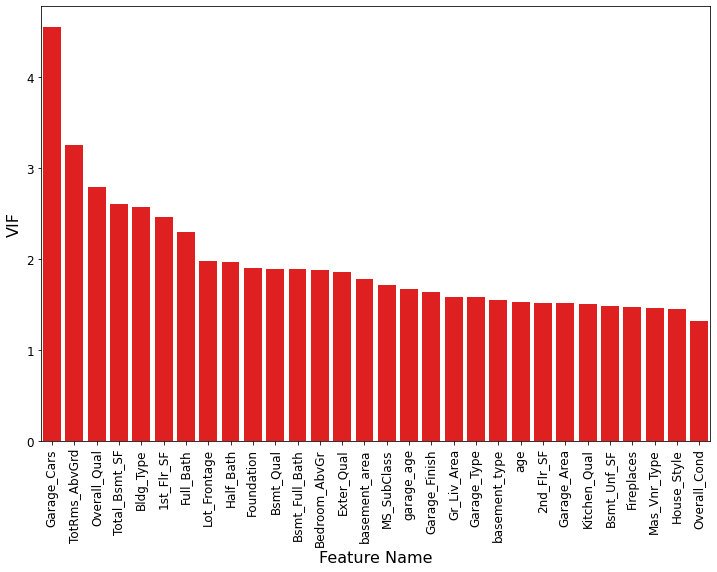

In [28]:
df = pd.DataFrame.from_dict(data,orient ='index').reset_index()
df.columns = ['Feature','VIF']

fig,ax = plt.subplots(1,1,figsize=(12,8))
zv = sns.barplot(data = df.iloc[:30,:],x='Feature',y='VIF', color='red')
zv.set_xlabel('Feature Name', fontsize=16)
zv.set_ylabel('VIF', fontsize=16)
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [30]:
np.random.seed(144)
print('RBF function with Y')

sc = StandardScaler()
Ames_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Ames_scaled, Y, test_size = 0.33, stratify=AmesFinal['salePriceCat'])

svr1 = svm.SVR(C= 3e5, gamma = 0.0003, tol = 1e-6)

%time svr1.fit(X_train, Y_train)

R2_train = np.round(svr1.score(X_train,Y_train),3)
R2_test  = np.round(svr1.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))
print('Number of support vectors are :', svr1.n_support_[0])

RBF function with Y
CPU times: total: 844 ms
Wall time: 844 ms
Training score is :0.929
Testing  score is :0.845
Number of support vectors are : 1963


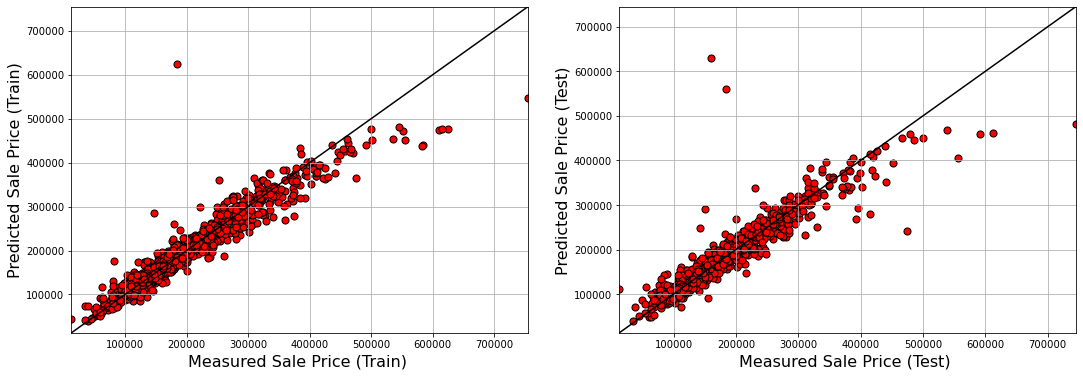

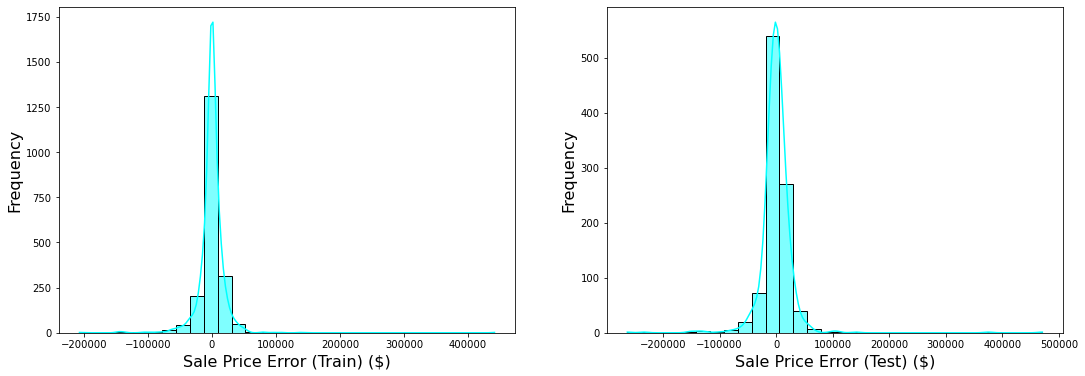

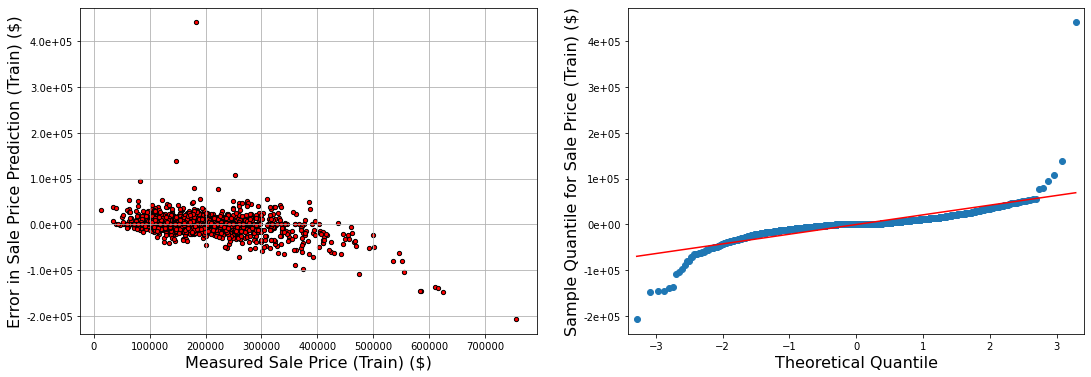

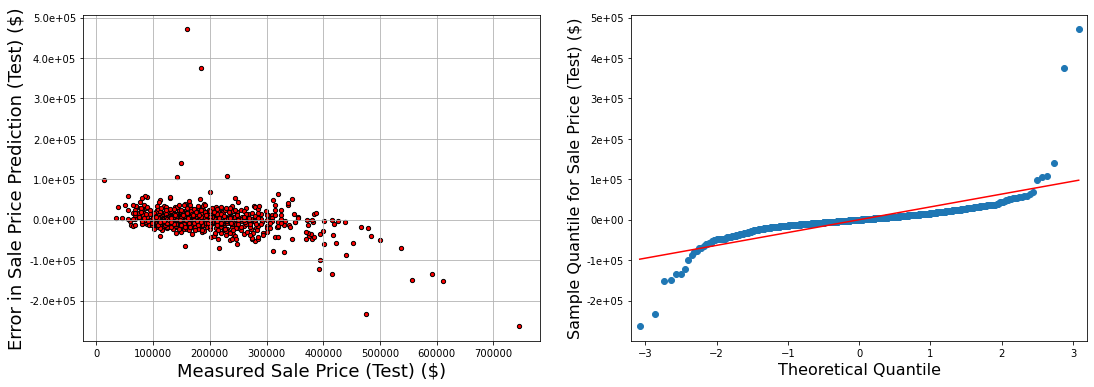

In [31]:
plot_randomforest(svr1,X_train,X_test,Y_train,Y_test)

In [32]:
np.random.seed(144)
print('Poly 2 function')

sc = StandardScaler()
Ames_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Ames_scaled, Y, test_size = 0.33)

svr2 = svm.SVR( gamma = 1, kernel = 'poly', degree = 2, epsilon = 0.1)

%time svr2.fit(X_train, Y_train)

R2_train = np.round(svr2.score(X_train,Y_train),3)
R2_test  = np.round(svr2.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))
print('Number of support vectors are :', svr2.n_support_[0])

Poly 2 function
CPU times: total: 734 ms
Wall time: 729 ms
Training score is :0.951
Testing  score is :0.811
Number of support vectors are : 1963


In [33]:
np.random.seed(144)
print('sigmoid function')

sc = StandardScaler()
Ames_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Ames_scaled, Y, test_size = 0.33)

svr3 = svm.SVR(kernel = 'sigmoid')

%time svr3.fit(X_train, Y_train)

R2_train = np.round(svr3.score(X_train,Y_train),3)
R2_test  = np.round(svr3.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))
print('Number of support vectors are :', svr3.n_support_[0])

sigmoid function
CPU times: total: 438 ms
Wall time: 443 ms
Training score is :-0.067
Testing  score is :-0.053
Number of support vectors are : 1962


In [34]:
fitted_data, fitted_lambda = stats.boxcox(Y)
print('Lambda parameter is :', fitted_lambda)

Lambda parameter is : 0.007644244604190389


In [35]:
np.random.seed(144)

AmesFinal['salePriceCat'] = pd.cut(Ames.SalePrice,bins=5,labels = range(5)).values

Ames_scaled = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(Ames_scaled, fitted_data, test_size = 0.33,
                                                                 stratify=AmesFinal['salePriceCat'])
svr3 = svm.SVR(C= 2e-1, gamma = 0.0003, tol = 1e-5)

%time svr3.fit(X_train, Y_train)

R2_train = np.round(svr3.score(X_train,Y_train),3)
R2_test  = np.round(svr3.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))
print('Number of support vectors are :', svr3.n_support_[0])

CPU times: total: 203 ms
Wall time: 202 ms
Training score is :0.874
Testing  score is :0.879
Number of support vectors are : 667


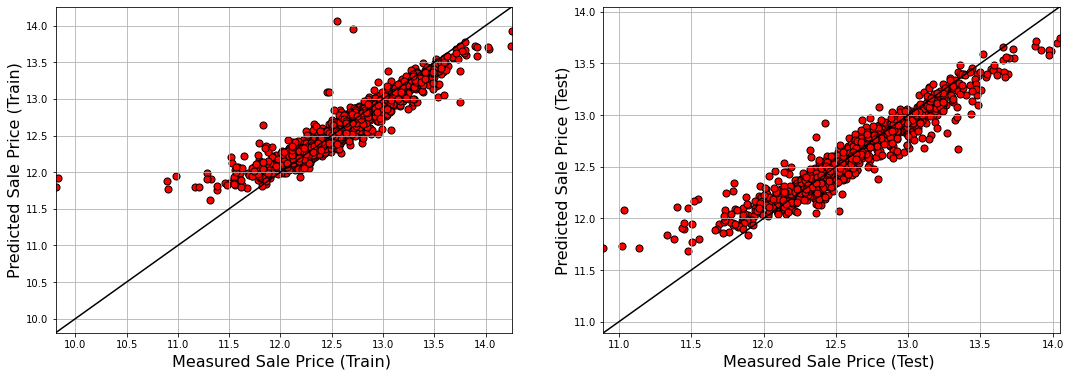

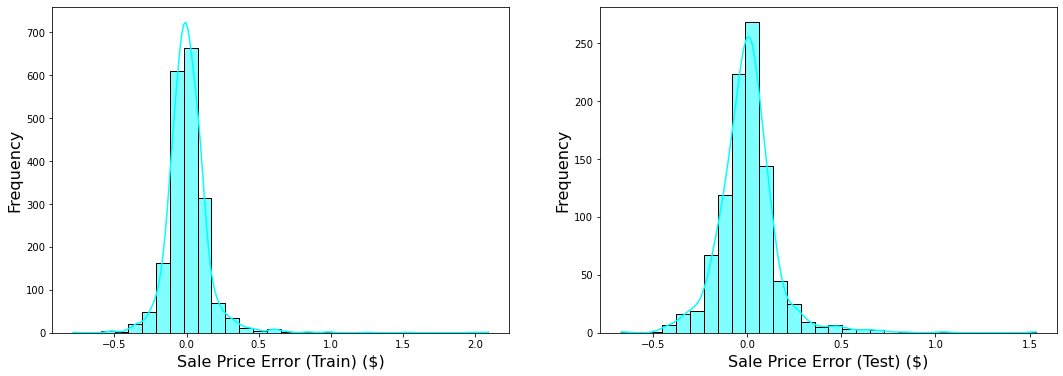

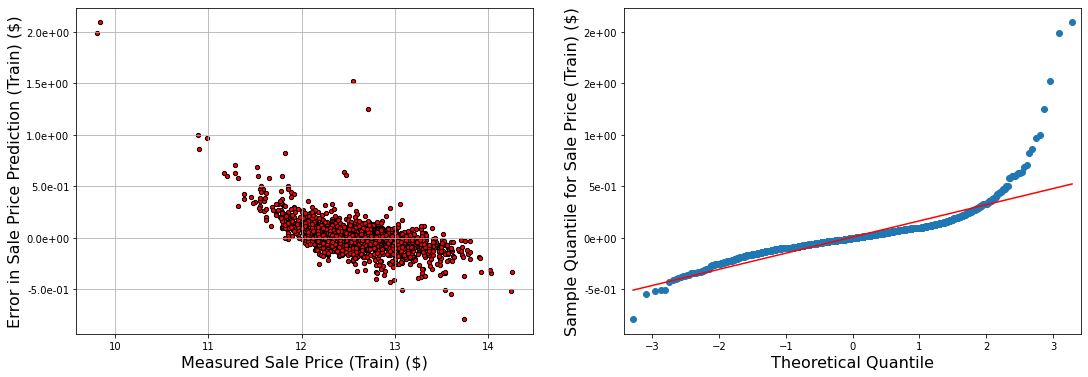

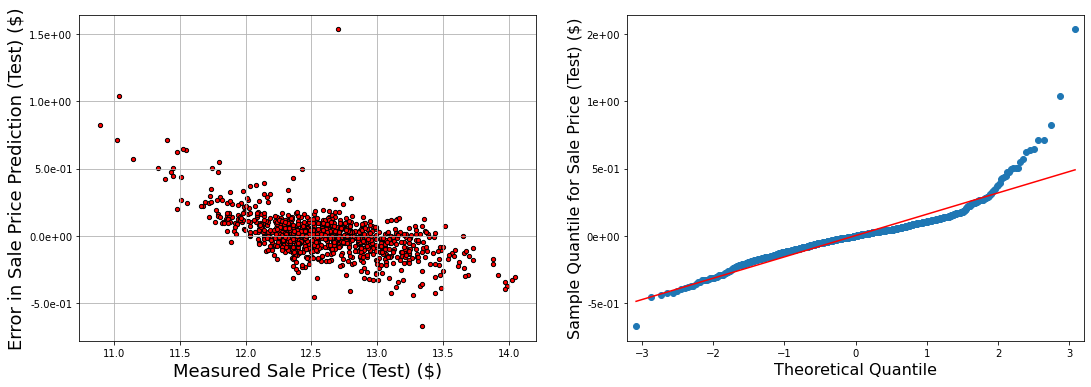

In [36]:
plot_randomforest(svr3,X_train,X_test,Y_train,Y_test)

In [37]:
std_sel = {}
std1 = np.array([])
std2 = np.array([])

for icol in AmesFinal.columns:
    
    std1   = np.hstack([std1,np.std(AmesFinal.loc[:,icol].values)])
    std2   = np.hstack([std2,np.std(AmesFinal.loc[svr1.support_,icol].values)])
    
stdt = np.hstack([std1.reshape(-1,1),std2.reshape(-1,1)])
df = pd.DataFrame(data = stdt,index = AmesFinal.columns, columns=['total_std','selected_std'])

df['ratio'] = df['selected_std']/df['total_std']
dfOC = df.loc[set(Ordinal_featues+Continous_features)-set(['SalePrice']),:].sort_values(by='ratio',ascending=False)
dfOC.reset_index(inplace=True)

In [38]:
dfOC['ratio'] = dfOC['ratio'].astype(float)

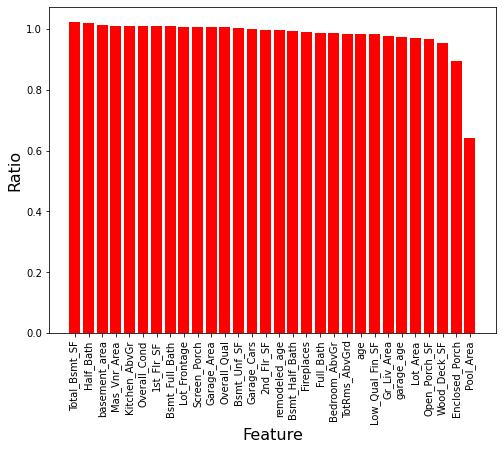

In [39]:
fig, axis = plt.subplots(1,1,figsize=(8,6))
plt.bar(dfOC['index'],dfOC['ratio'],color='red')
plt.xlabel('Feature',fontsize=16)
plt.ylabel('Ratio',fontsize=16)
plt.xticks(rotation = 90);

In [40]:
df = df.sort_values(by='ratio',ascending=False)
df.tail(10)

,total_std,selected_std,ratio
Roof_Style_Shed,0.041274,0.031903,0.772953
Garage_Type_2Types,0.088251,0.067556,0.765499
basement_type_ALQ_GLQ,0.031982,0.022565,0.705545
Heating_QC_Po,0.031982,0.022565,0.705545
Pool_Area,35.591105,22.840395,0.641744
Sale_Condition_AdjLand,0.063865,0.031903,0.499537
Neighborhood_GrnHill,0.026118,0.000000,0.000000
MS_SubClass_150,0.018471,0.000000,0.000000
Neighborhood_Landmrk,0.018471,0.000000,0.000000
Sale_Type_VWD,0.018471,0.000000,0.000000


In [ ]:
svr1.support_